In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path
import datetime
import re

# analysis
import numpy as np
import pandas as pd

In [3]:
fpath = '/data/raw/creditcard.csv'
df = pd.read_csv(fpath)

In [4]:
import sys
sys.path.append('src')
from sklearn.model_selection import train_test_split

In [ ]:
os.cpu_count()

In [21]:
from src.utils import FraudEvaluator

In [22]:
from src.gbm import GBMFraudDetector
os.environ['OMP_NUM_THREADS'] = '4' 

2025-04-05 20:34:03,014 - GBMFraudDetector - INFO - Class distribution: {0: 227451, 1: 394}
2025-04-05 20:34:03,015 - GBMFraudDetector - INFO - Minority class percentage: 0.17%
2025-04-05 20:34:03,015 - GBMFraudDetector - INFO - Starting hyperparameter optimization with 100 trials...
[I 2025-04-05 20:34:03,016] A new study created in memory with name: no-name-3d417af0-64f7-4dc9-99c0-2decbd0eb221


Dataset shape: (284807, 31)
Fraud distribution: Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


/opt/venv/eda/lib/python3.10/site-packages/lightgbm/basic.py:2137: UserWarning: feature_name keyword has been found in `params` and will be ignored.
Please use feature_name argument of the Dataset constructor to pass this parameter.
  _log_warning(
/opt/venv/eda/lib/python3.10/site-packages/lightgbm/basic.py:2137: UserWarning: feature_name keyword has been found in `params` and will be ignored.
Please use feature_name argument of the Dataset constructor to pass this parameter.
  _log_warning(
/opt/venv/eda/lib/python3.10/site-packages/lightgbm/basic.py:2137: UserWarning: feature_name keyword has been found in `params` and will be ignored.
Please use feature_name argument of the Dataset constructor to pass this parameter.
  _log_warning(
/opt/venv/eda/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/venv/eda/lib/python3.10/site-packages/sklearn/utils/val


Evaluation results:
FRAUD DETECTION MODEL EVALUATION REPORT

BASIC METRICS:
--------------------------------------------------
Accuracy: 0.9996
Precision: 0.9518
Recall: 0.8061
Specificity: 0.9999
F1 Score: 0.8729

AUC METRICS:
--------------------------------------------------
ROC AUC: 0.9729
PR AUC: 0.8577

CONFUSION MATRIX COUNTS:
--------------------------------------------------
True Positives: 79
False Positives: 4
True Negatives: 56860
False Negatives: 19

BUSINESS IMPACT METRICS:
--------------------------------------------------
Net Savings: $-1640.00

ADDITIONAL DETAILS:
--------------------------------------------------
Classification Threshold: 0.9219

CONFUSION MATRIX:
--------------------------------------------------
                 Predicted
                 Neg    Pos
Actual   Neg    56860  4     
         Pos    19     79    



/opt/venv/eda/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

2025-04-05 20:57:11,440 - GBMFraudDetector - INFO - Model saved to /workspace/python/202412_fraud/notebooks/gbm_fraud_model.joblib


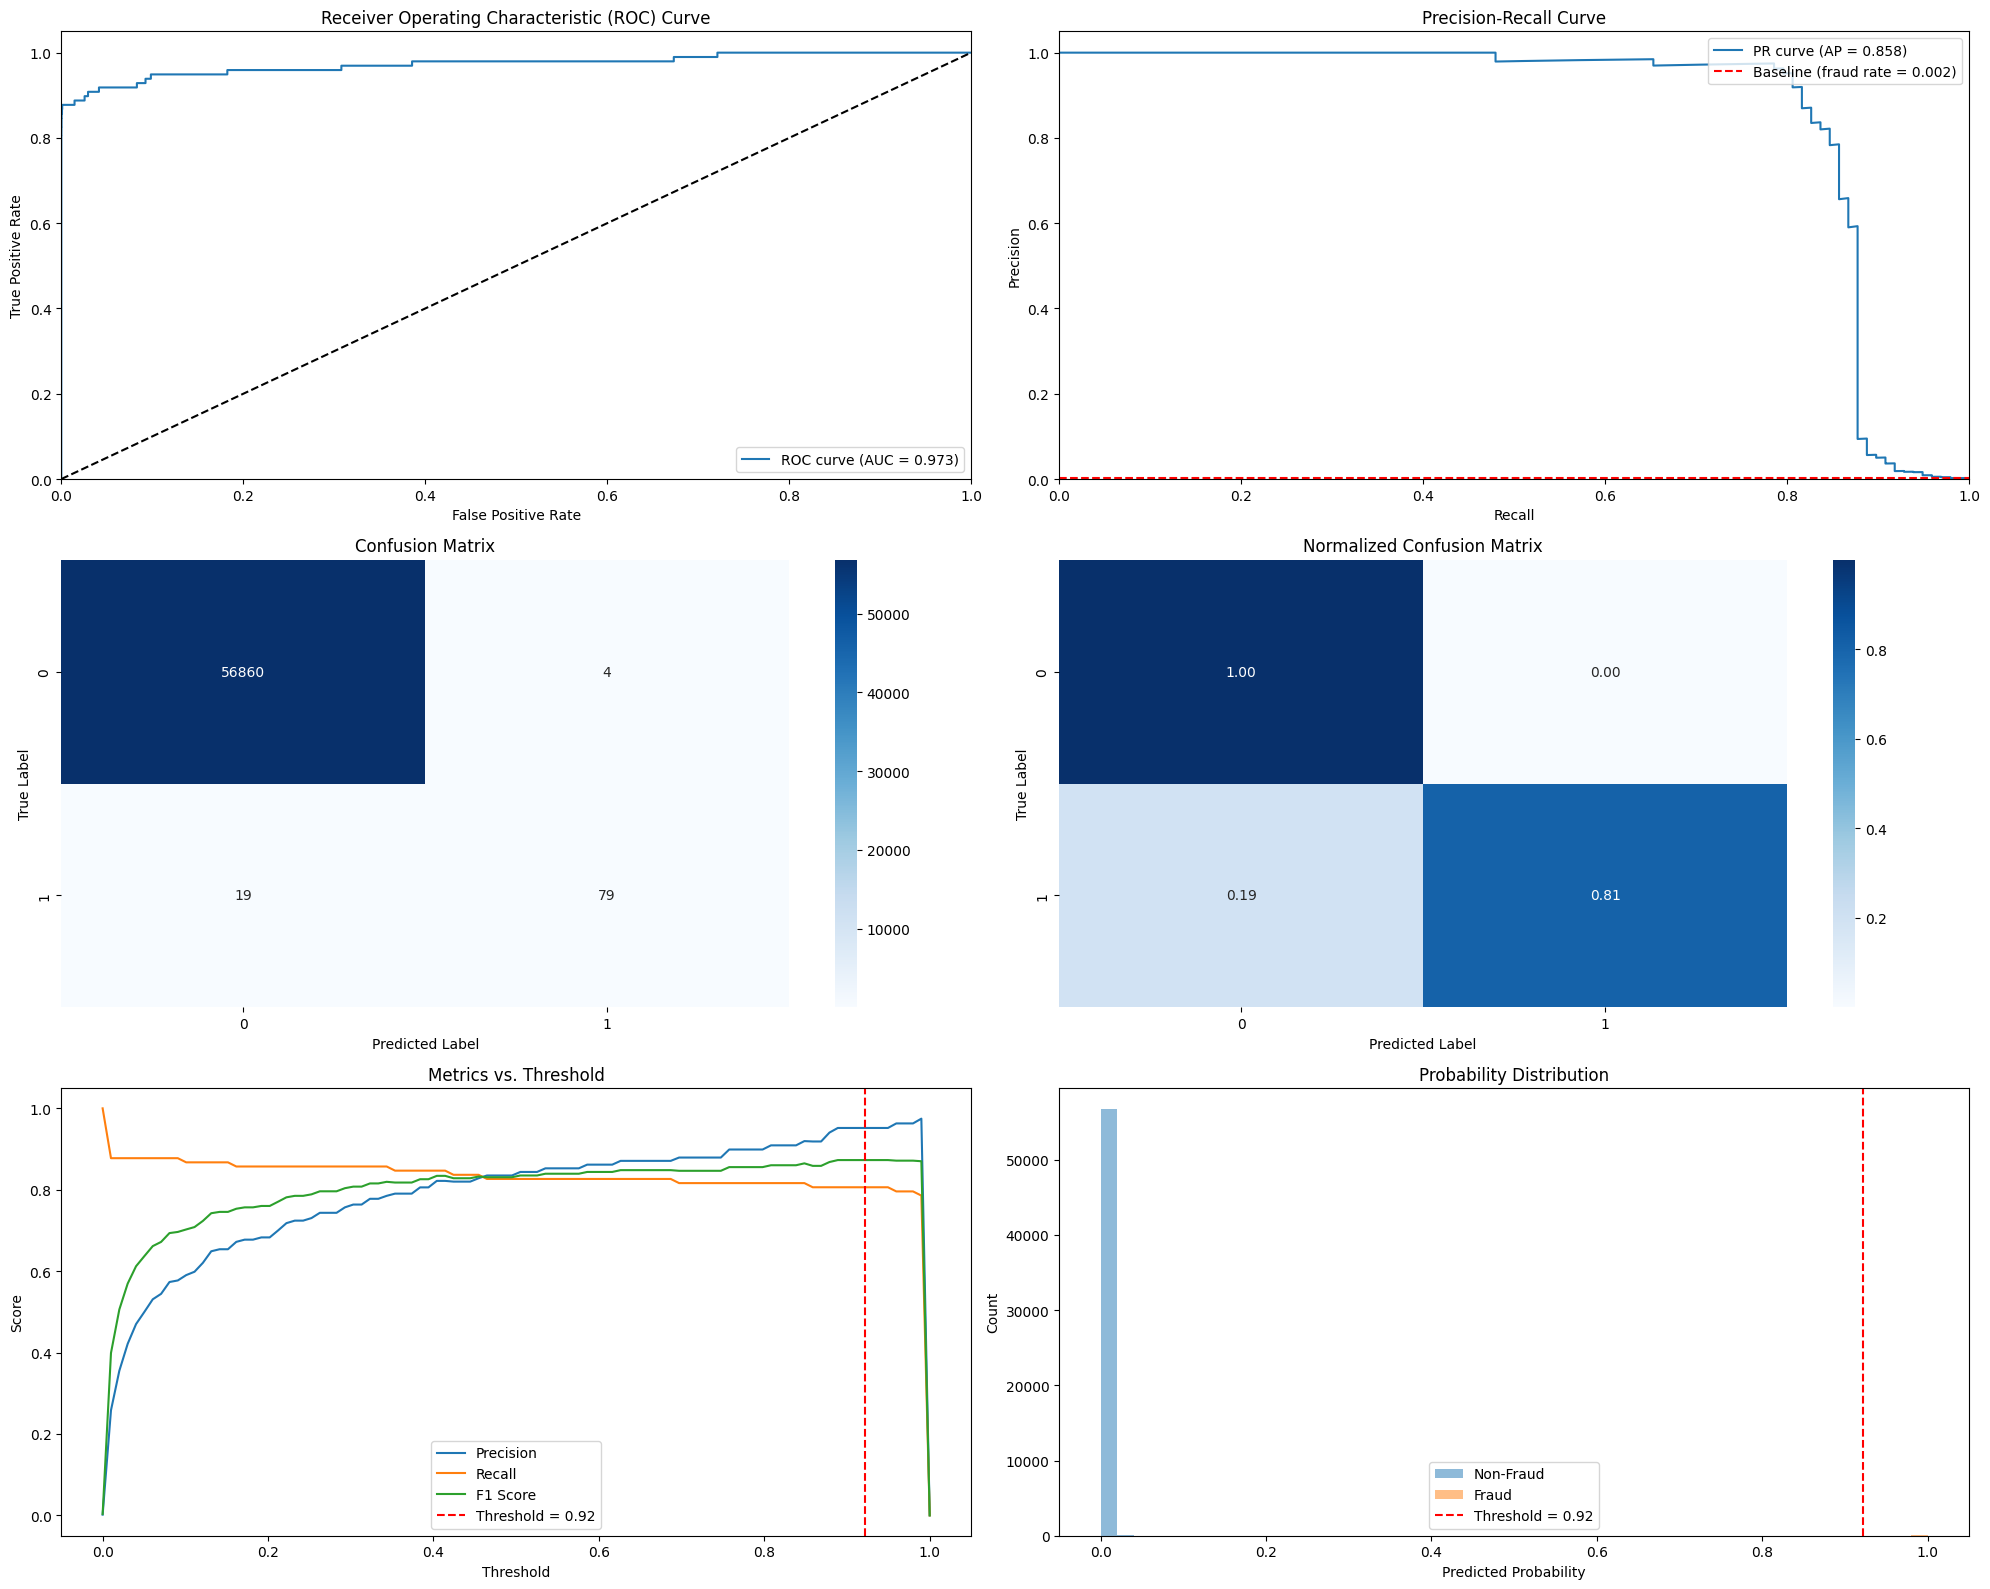

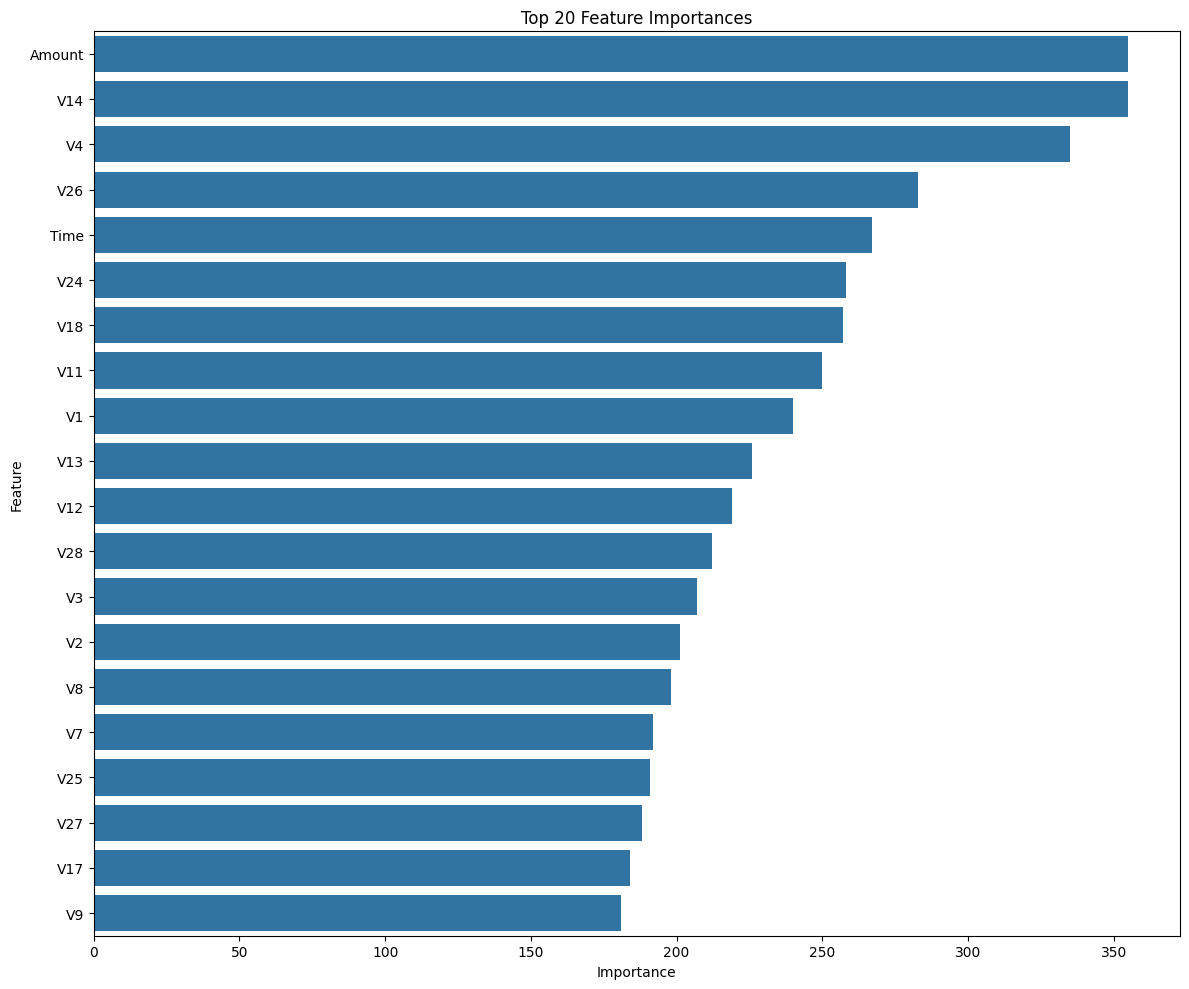

In [23]:
print(f"Dataset shape: {df.shape}")
print(f"Fraud distribution: {df['Class'].value_counts(normalize=True) * 100}")

# Split into train and test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Class'])

# Initialize and optimize GBM detector
gbm_detector = GBMFraudDetector()
gbm_detector.optimize(train_df, n_trials=100)  # Reduced for example

# Evaluate on test data
results = gbm_detector.evaluate(test_df)
print("\nEvaluation results:")
print(FraudEvaluator.generate_report(results))

# Plot evaluation metrics
gbm_detector.plot_evaluation(test_df)

# Plot feature importance
gbm_detector.plot_feature_importance()

# Plot optimization history
gbm_detector.plot_optimization_history()

# Save the model
gbm_detector.save_model(Path.cwd() / 'gbm_fraud_model.joblib')

In [41]:
from src.nn import DeepFraudDetector

2025-04-05 21:35:32,211 - DeepFraudDetector - INFO - Adding derived features...


Dataset shape: (284807, 31)
Fraud distribution: Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


2025-04-05 21:36:19,141 - DeepFraudDetector - INFO - Added 10 derived features
2025-04-05 21:36:19,297 - DeepFraudDetector - INFO - Class distribution before sampling: [227451    394]
2025-04-05 21:36:19,298 - DeepFraudDetector - INFO - Minority class percentage: 0.17%
2025-04-05 21:36:19,516 - DeepFraudDetector - INFO - Class distribution after sampling: [227451  22745]
2025-04-05 21:36:19,710 - DeepFraudDetector - INFO - Starting model training...


Epoch 1/20
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9552 - auc: 0.9401 - loss: 0.1391 - pr_auc: 0.8304 - precision: 0.7948 - recall: 0.7578
Epoch 1: val_pr_auc improved from -inf to 0.99044, saving model to deep_fraud_model/best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9554 - auc: 0.9405 - loss: 0.1385 - pr_auc: 0.8314 - precision: 0.7959 - recall: 0.7586 - val_accuracy: 0.9910 - val_auc: 0.9990 - val_loss: 0.0233 - val_pr_auc: 0.9904 - val_precision: 0.9700 - val_recall: 0.9301 - learning_rate: 0.0010
Epoch 2/20
769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9883 - auc: 0.9958 - loss: 0.0332 - pr_auc: 0.9798 - precision: 0.9540 - recall: 0.9152
Epoch 2: val_pr_auc improved from 0.99044 to 0.99619, saving model to deep_fraud_model/best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9883 - auc: 0.9958 - loss: 0.0332 - pr_auc: 0.9799 - precision: 0.9540 - recall: 0.9153 - val_accuracy: 0.9955 - val_auc: 0.9997 - val_loss

2025-04-05 21:37:28,077 - DeepFraudDetector - INFO - Optimized threshold: 0.9085
2025-04-05 21:37:28,077 - DeepFraudDetector - INFO - Training completed in 115.87 seconds



Evaluation results:
accuracy: 0.9995
precision: 0.8542
recall: 0.8367
specificity: 0.9998
f1_score: 0.8454
true_positives: 82.0000
false_positives: 14.0000
true_negatives: 56850.0000
false_negatives: 16.0000
threshold: 0.9028
roc_auc: 0.9589
pr_auc: 0.8596
detection_rate: 0.8367
false_alarm_rate: 0.0002
net_savings: 13060.0000


2025-04-05 21:37:31,711 - DeepFraudDetector - INFO - Model and components saved to /workspace/python/202412_fraud/notebooks/deep_fraud_model


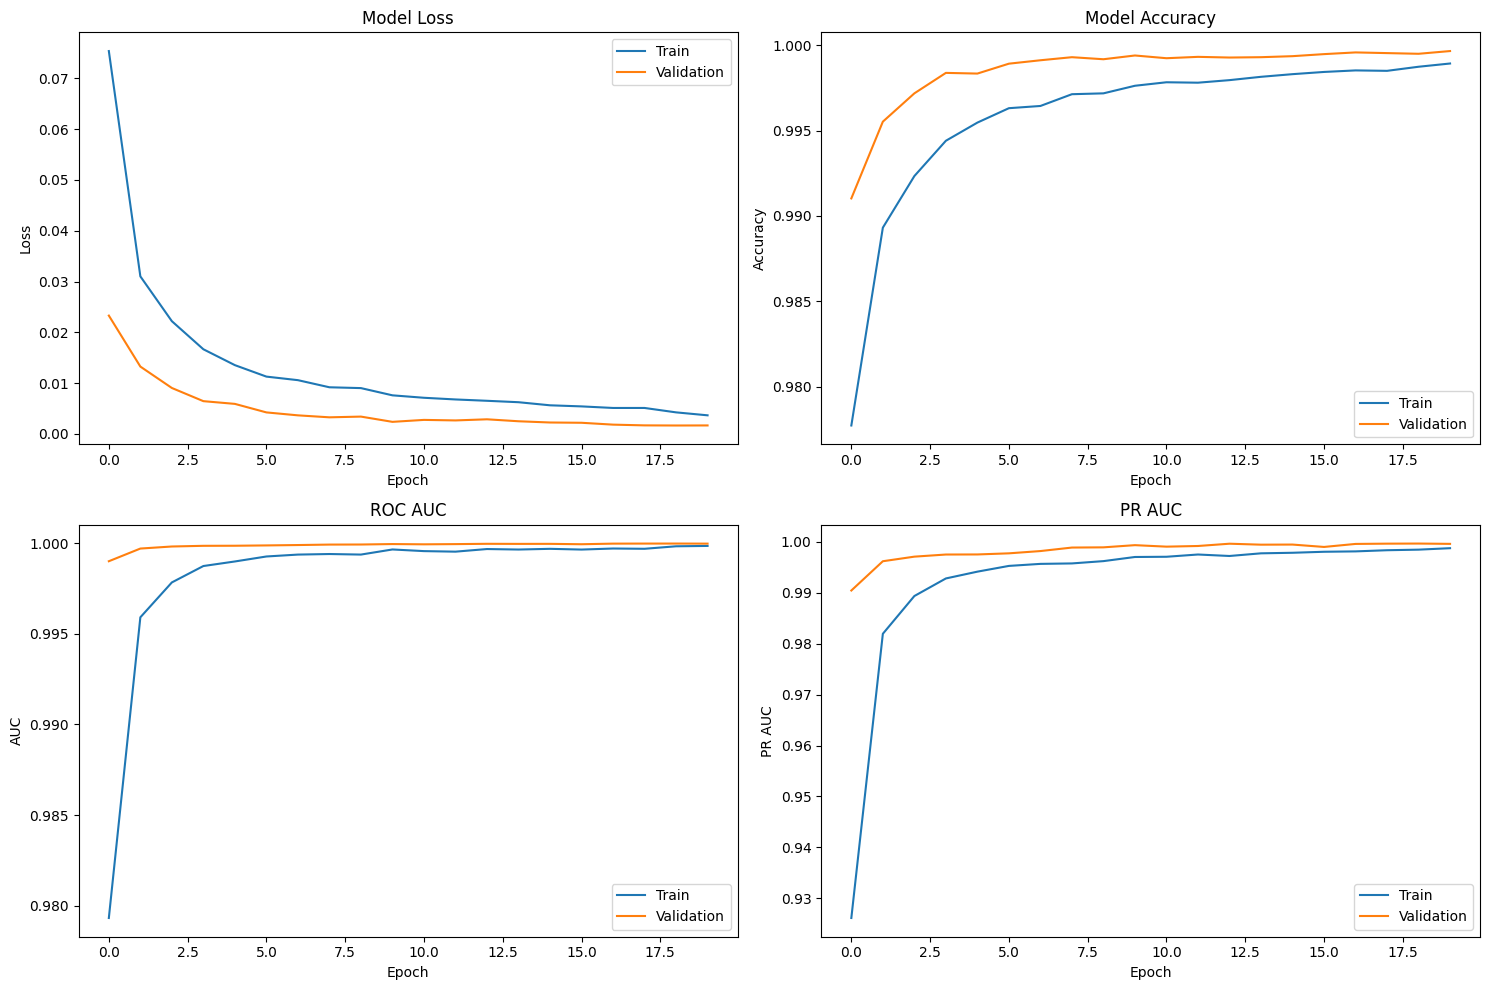

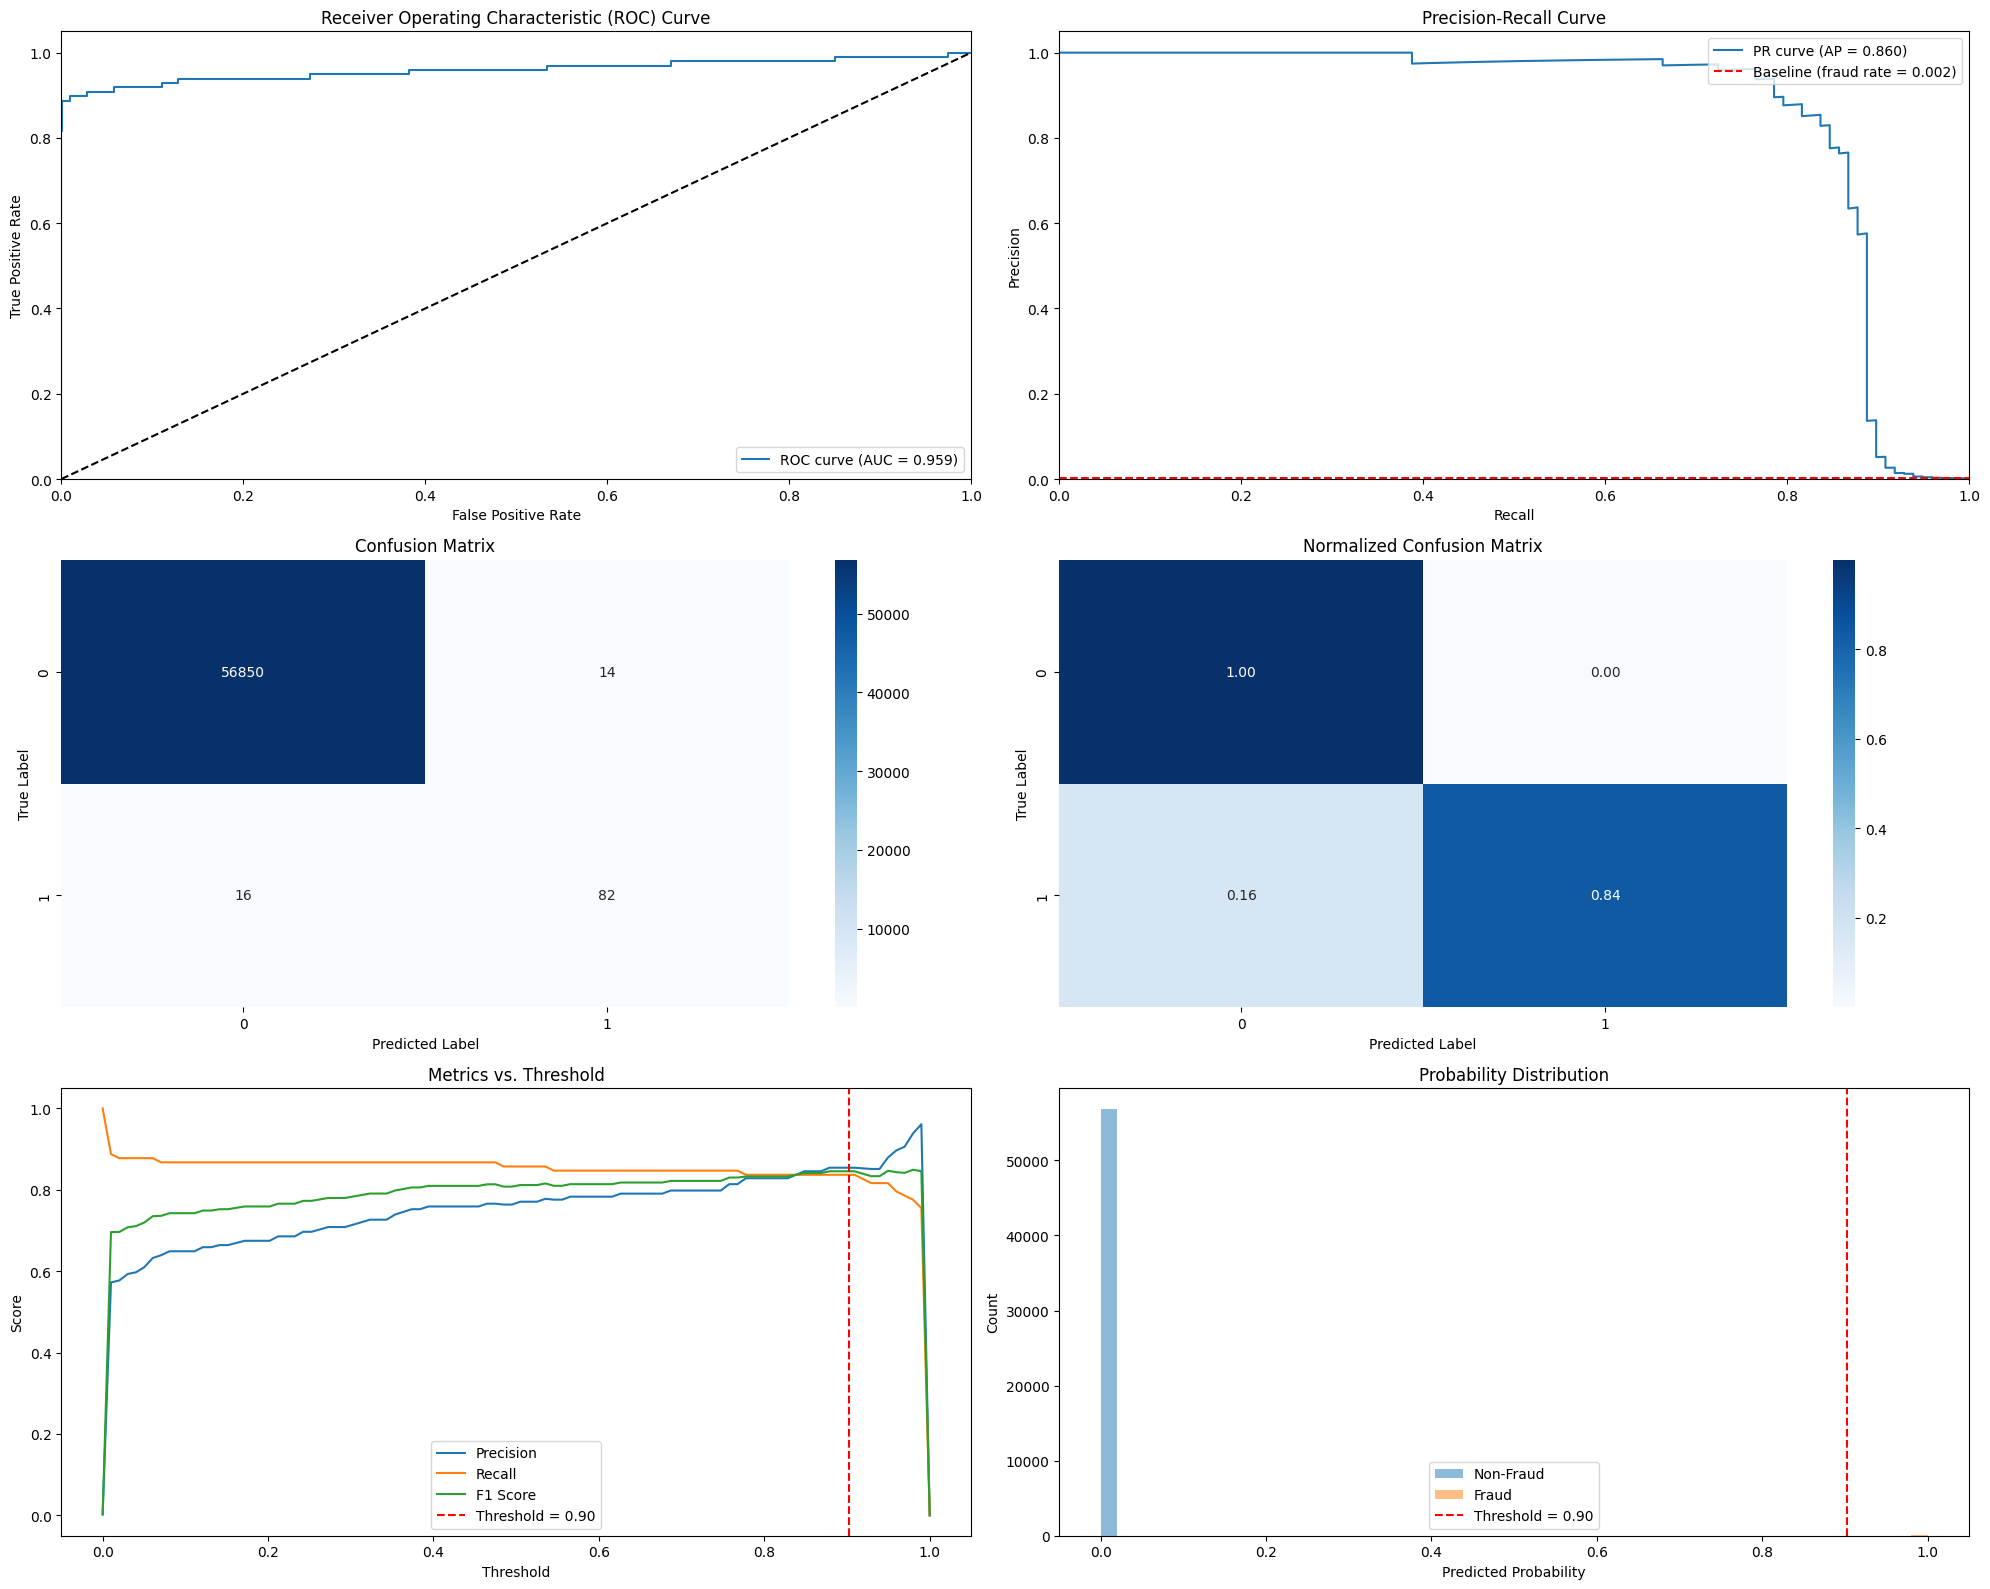

In [42]:
print(f"Dataset shape: {df.shape}")
print(f"Fraud distribution: {df['Class'].value_counts(normalize=True) * 100}")

refresh = True

if refresh:

    # Split into train and test
    from sklearn.model_selection import train_test_split
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Class'])
    
    # Initialize the deep learning fraud detector
    detector = DeepFraudDetector(
        time_column='Time',
        amount_column='Amount',
        target_column='Class',
        feature_prefix='V'
    )
    
    # Build and train the model (with fewer epochs for demonstration)
    # Now using the new derived features
    history = detector.fit(
        train_df,
        validation_split=0.2,
        epochs=20,        # Reduced for example
        batch_size=256,
        patience=5,
        sampling_method='smote',
        sampling_ratio=0.1,
        use_derived_features=True  # Enable the derived features
    )
    
    # Plot training history
    detector.plot_history(history)

else:
    deep_detector = deep_detector.load_model(Path.cwd() / 'deep_fraud_model')

# Evaluate on test data
results = deep_detector.evaluate(test_df)
print("\nEvaluation results:")
for metric, value in results.items():
    if metric != 'confusion_matrix':
        print(f"{metric}: {value:.4f}")

# Plot evaluation metrics
deep_detector.plot_evaluation(test_df)

# Save the model
deep_detector.save_model(Path.cwd() / 'deep_fraud_model')

# # Test loading the model
# loaded_detector = DeepFraudDetector.load_model(Path.cwd() / 'deep_fraud_model')

# # Make predictions with loaded model
# predictions = loaded_detector.predict(test_df)
# print(f"\nPredictions shape: {predictions.shape}")

In [35]:
from src.utils import FraudEvaluator

/opt/venv/eda/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/opt/venv/eda/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



FRAUD DETECTION MODEL EVALUATION REPORT

BASIC METRICS:
--------------------------------------------------
Accuracy: 0.9995
Precision: 0.8542
Recall: 0.8367
Specificity: 0.9998
F1 Score: 0.8454

AUC METRICS:
--------------------------------------------------
ROC AUC: 0.9589
PR AUC: 0.8596

CONFUSION MATRIX COUNTS:
--------------------------------------------------
True Positives: 82
False Positives: 14
True Negatives: 56850
False Negatives: 16

BUSINESS IMPACT METRICS:
--------------------------------------------------
Net Savings: $13060.00

ADDITIONAL DETAILS:
--------------------------------------------------
Classification Threshold: 0.9028

CONFUSION MATRIX:
--------------------------------------------------
                 Predicted
                 Neg    Pos
Actual   Neg    56850  14    
         Pos    16     82    

FRAUD DETECTION MODEL EVALUATION REPORT

BASIC METRICS:
--------------------------------------------------
Accuracy: 0.9996
Precision: 0.9518
Recall: 0.8061
Spec

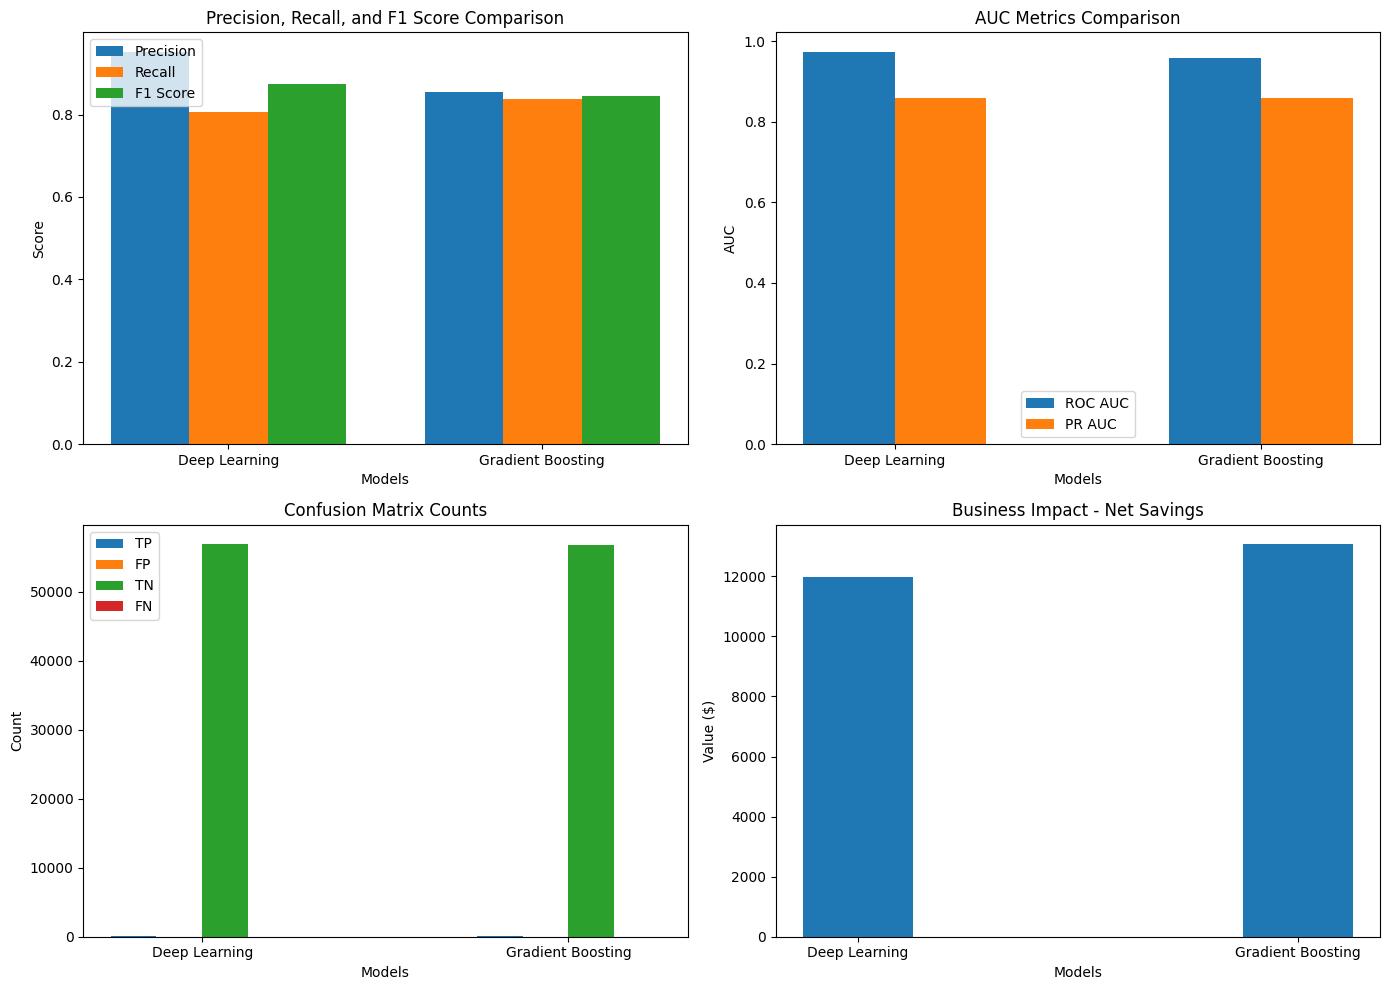

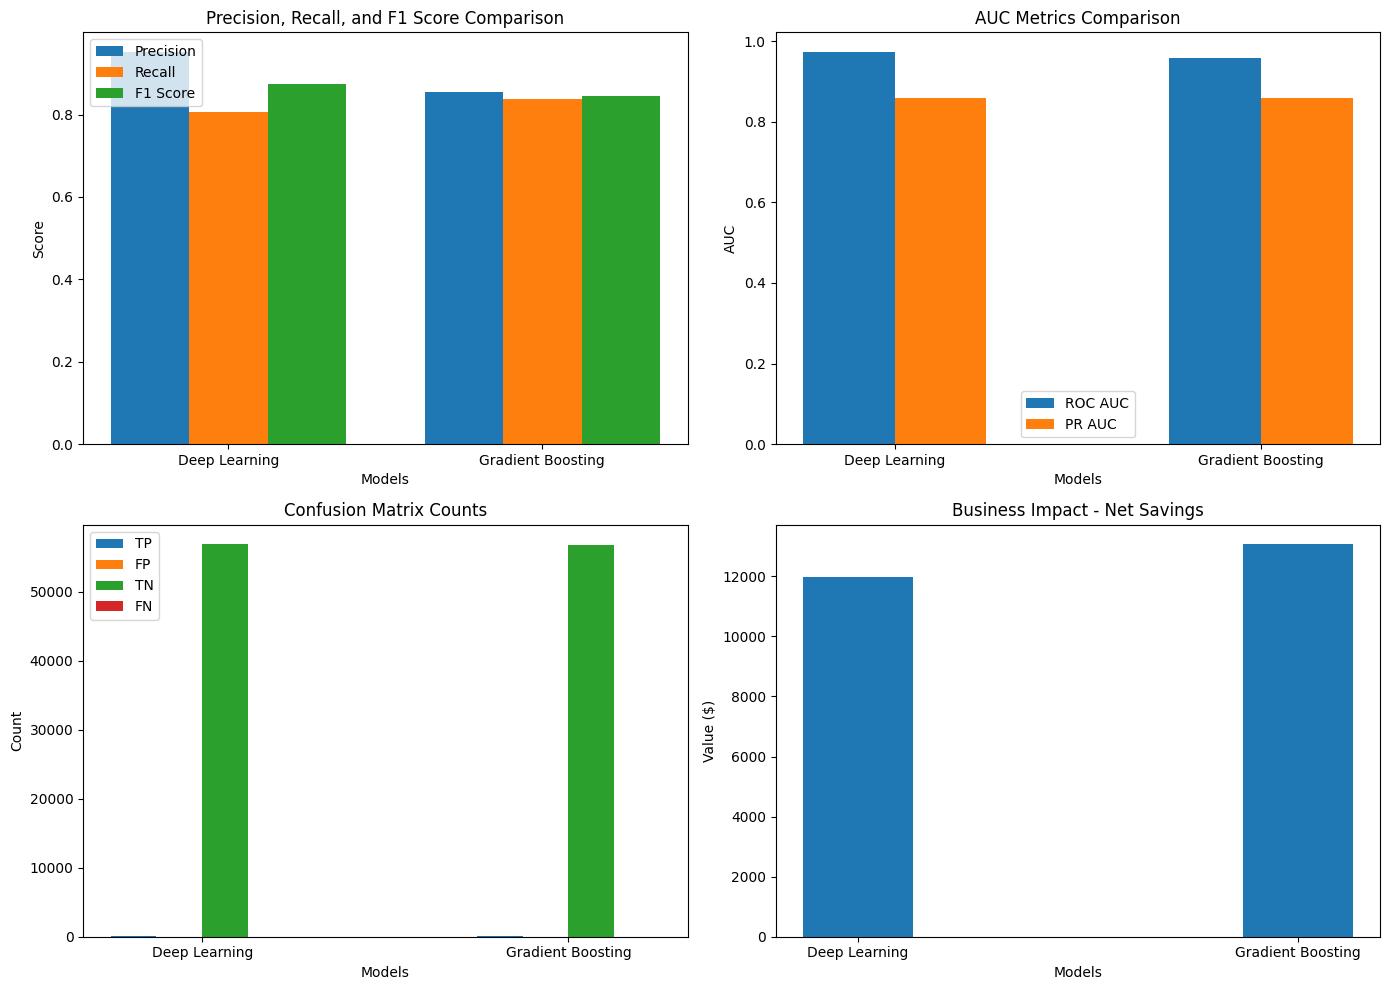

In [44]:
gbm_results = deep_detector.evaluate(test_df)
nn_results = gbm_detector.evaluate(test_df)
model_results = {
    'Deep Learning': nn_results,
    'Gradient Boosting': gbm_results,
}
print(FraudEvaluator.generate_report(gbm_results))
print(FraudEvaluator.generate_report(nn_results))
# Generate comparison visualization
FraudEvaluator.compare_models(model_results)